<a href="https://colab.research.google.com/github/debtavares/projeto-pam/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship Titanic

## Overview
A nave espacial Titanic foi um transatlântico interestelar de passageiros lançado há um mês. Com quase 13.000 passageiros a bordo, a nave partiu em sua viagem inaugural transportando emigrantes do nosso sistema solar para três exoplanetas recém-habitáveis ​​orbitando estrelas próximas.

Enquanto contornava Alpha Centauri a caminho de seu primeiro destino - o tórrido 55 Cancri E - a desavisada nave Titanic colidiu com uma anomalia do espaço-tempo escondida dentro de uma nuvem de poeira. Infelizmente, ele encontrou um destino semelhante ao seu homônimo de 1000 anos antes. Embora a nave tenha permanecido intacta, quase metade dos passageiros foram transportados para uma dimensão alternativa!

Para ajudar as equipes de resgate e recuperar os passageiros perdidos, duas cientistas de dados a prever quais passageiros foram transportados pela anomalia usando registros recuperados do sistema de computador danificado da nave espacial.

### File and Data Field Descriptions
* **PassengerId** - Um Id único para cada passageiro. Cada Id tem o formato gggg_pp onde gggg indica o grupo que o passageiro está viajando e pp é seu número dentro do grupo. Pessoas em grupo são geralmente famílias, mas nem sempre.
* **HomePlanet** - Planeta em que o passageiro partiu.
* **CryoSleep** - Indica se o passegeiro optou por ser colocado em sono criogênio durante a viagem. Eles ficam dentro das cabines.
* **Cabin** - Número da cabine em que o passageiro está. Possui o formato deck/num/lado, onde o lado pode ser P para bombordo ou S para estibordo.
* **Destination** - Planeta em que o passageiro irá desembarcar.
* **Age** - Idade do passageiro.
* **VIP** - Se o passageiro parou pelo serviço VIP especial.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Valor faturado pelo passageiro em cada uma das comodidades de luxo da nave espacial titanic.
* **Name** - Primeiro e último nome do passageiro.
* **Transported** - Se o passageiro foi transportado para outra dimensão. Essa é a variável target, a coluna que estamos tentando predizer.
* **train.csv** - Registros pessoais de cerca de dois terços (~8700) dos passageiros, para serem usados como dados de treinamento.
* **test.csv** - Registros pessoais de cerca de um terço (~4300) dos passageiros, para serem usados como dados de teste. A tarefa é prever o valor de Transportado para os passageiros neste conjunto.
* **sample_submission.csv** - Um arquivo de envio no formato correto.




In [ ]:
# Imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Colab/spaceship titanic/test.csv")
df_train = pd.read_csv("/content/drive/MyDrive/Colab/spaceship titanic/train.csv")

df_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
# shape
print("Train Data Shape :",df_train.shape)
print("Test Data Shape :",df_test.shape)

Train Data Shape : (8693, 14)
Test Data Shape : (4277, 13)


In [ ]:
# valores duplicados
print("Train data :",df_train.duplicated().sum())
print("Test data :",df_test.duplicated().sum())

Train data : 0
Test data : 0


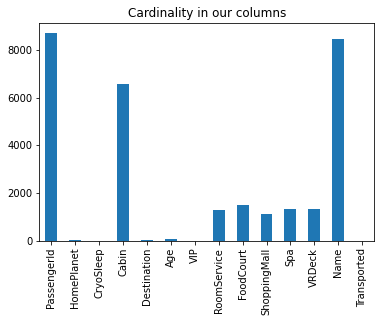

In [ ]:
# Cardinalidade:  medida do número de elementos do conjunto.
df_train.nunique().plot.bar(title="Cardinality in our columns")

In [ ]:
df_train_copy = df_train.copy()
df_train_copy

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
# PassengerId tem uma cardinalidade alta, pois essa feature possui duas informações: o grupo que o passageiro está viajando e o número desse grupo
# vamos separar as informações da coluna PassengerId

df_train_copy[["Passenger_group","Passennger_no._in_group"]]=df_train["PassengerId"].str.split("_",expand=True)
df_train_copy.drop(columns=["PassengerId"],inplace=True)
df_train_copy.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Passenger_group,Passennger_no._in_group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [ ]:
# separando informações da coluna Cabin

df_train_copy[["Cabin_deck","Cabin_no.","Cabin_side"]]=df_train["Cabin"].str.split("/",expand=True)
df_train_copy.drop(columns=["Cabin"],inplace=True)
df_train_copy.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Passenger_group,Passennger_no._in_group,Cabin_deck,Cabin_no.,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S


In [ ]:
# separando informações da coluna Name

df_train_copy[["firstname","lastname"]]=df_train["Name"].str.split(" ",expand=True)
df_train_copy.drop(columns=["Name"],inplace=True)
df_train_copy.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger_group,Passennger_no._in_group,Cabin_deck,Cabin_no.,Cabin_side,firstname,lastname
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,0,P,Maham,Ofracculy
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,F,0,S,Juanna,Vines
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,A,0,S,Altark,Susent
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,A,0,S,Solam,Susent
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,F,1,S,Willy,Santantines


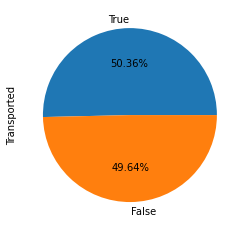

In [ ]:
# distribuição da variável alvo
df_train_copy['Transported'].value_counts().plot.pie(autopct='%1.2f%%')

A target é altamente balanceada, então não precisamos considerar técnicas como sub/sobre-amostragem.

Text(0.5, 0, 'Age (years)')

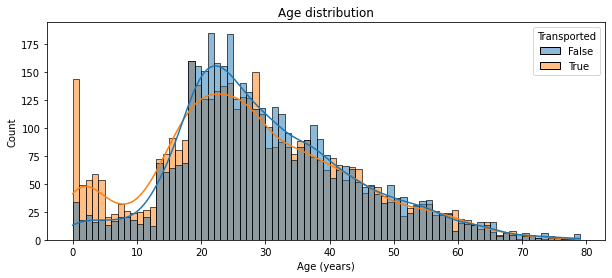

In [ ]:
# Idade vs se foram transportados ou não
plt.figure(figsize=(10,4))
sns.histplot(data=df_train_copy, x='Age', hue='Transported', binwidth=1, kde=True)
plt.title('Age distribution')
plt.xlabel('Age (years)')

Text(0.5, 0, 'Passennger no. in group (value)')

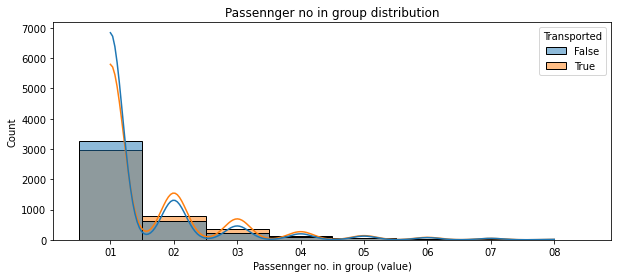

In [ ]:
# Passageiros
plt.figure(figsize=(10,4))
sns.histplot(data=df_train_copy, x='Passennger_no._in_group', hue='Transported', binwidth=1, kde=True)
plt.title('Passennger no in group distribution')
plt.xlabel('Passennger no. in group (value)')

Passageiros viajando em grupo possuem mais chances de serem transportados

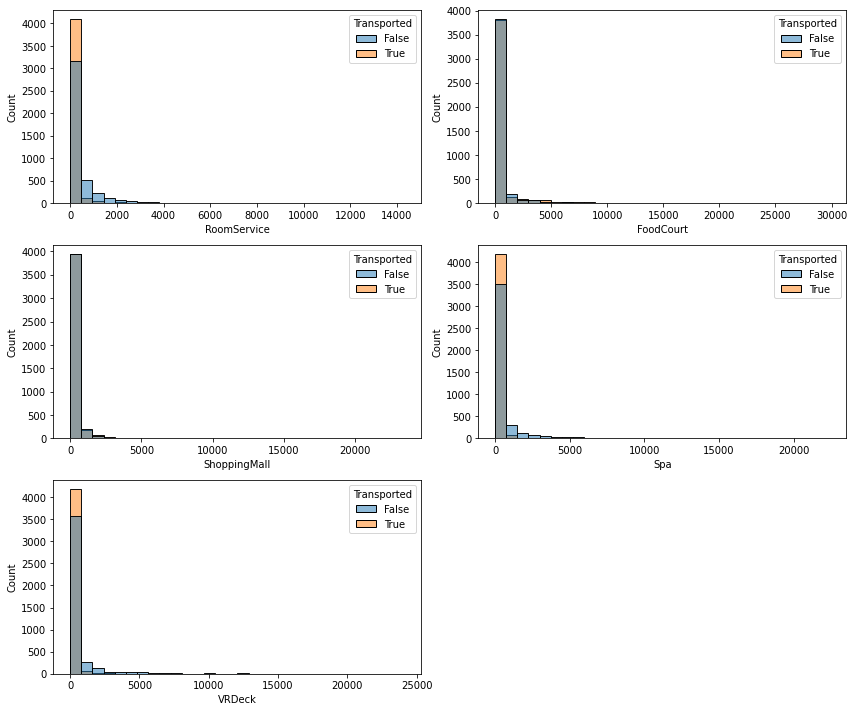

In [ ]:
# Despesas vs se foram transportados ou não
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig=plt.figure(figsize=(12,10))

for i,name in enumerate(exp_feats):
    ax = fig.add_subplot(3,2,i+1)
    sns.histplot(data=df_train_copy, x=name, axes=ax, bins=30, kde=False, hue='Transported')

plt.tight_layout()  
plt.show()

Passageiros que foram transportados tendem a ter gastos mais baixos, em média.

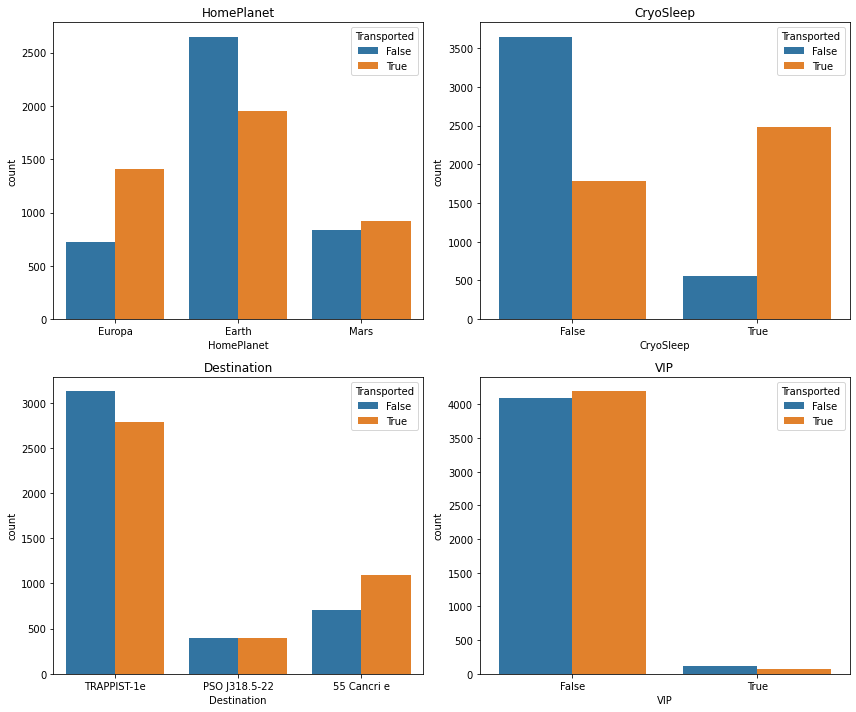

In [ ]:
# features categóricas
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


fig=plt.figure(figsize=(12,10))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(2,2,i+1)
    sns.countplot(data=df_train_copy, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  
plt.show()

In [ ]:
# Conclusões

# Passageiros que vieram da Europa e Marte possuem maiores chances de serem transportados ;
# 60% dos passageiros da Europa foram transportados, comparado aos 50% de Marte e 40% da Terra.
# Por mais que a terra tenha maior número de transportados, a porcentagem em relação aos não transportados é menor.

# Pessoas em sono criogênico possuem maiores chances de ser transportadas do que as que não estavam (80%). Apenas 35% dos passageiros que não estavam em sono criogênico foram transportados.

# A maioria das pessoas iria para TRAPPIST-1e, seguido de 55 Cancri e 

# A maioria das pessoas transportadas não era VIP 


In [ ]:
# dados faltantes
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
# checando % dos valores ausentes por coluna.
missing=(df_train.isnull().mean().sort_values(ascending=False)*100)

missing.sum()

26.734153916944667

In [ ]:
# optamos por descartar os dados faltantes
df_train.dropna(inplace = True)
df_train.shape

(6606, 14)

In [ ]:
df_test.dropna(inplace = True)
df_test.shape

(3281, 13)

### Pre-processamento

In [ ]:
df_train.drop(['PassengerId','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name','Cabin'], axis=1, inplace=True)
df_test.drop(['VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name','Cabin'], axis=1, inplace=True)

In [ ]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,Transported
0,Europa,False,TRAPPIST-1e,39.0,False
1,Earth,False,TRAPPIST-1e,24.0,True
2,Europa,False,TRAPPIST-1e,58.0,False
3,Europa,False,TRAPPIST-1e,33.0,False
4,Earth,False,TRAPPIST-1e,16.0,True


In [ ]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age
0,0013_01,Earth,True,TRAPPIST-1e,27.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0
2,0019_01,Europa,True,55 Cancri e,31.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0


In [ ]:
df_train = pd.get_dummies(df_train, columns=['CryoSleep','Destination','HomePlanet'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['CryoSleep','Destination','HomePlanet'], drop_first=True)

In [ ]:
df_train.head()

,Age,Transported,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Europa,HomePlanet_Mars
0,39.0,False,0,0,1,1,0
1,24.0,True,0,0,1,0,0
2,58.0,False,0,0,1,1,0
3,33.0,False,0,0,1,1,0
4,16.0,True,0,0,1,0,0


In [ ]:
x = df_train.drop('Transported', axis=1)
x

,Age,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Europa,HomePlanet_Mars
0,39.0,0,0,1,1,0
1,24.0,0,0,1,0,0
2,58.0,0,0,1,1,0
3,33.0,0,0,1,1,0
4,16.0,0,0,1,0,0
...,...,...,...,...,...,...
8688,41.0,0,0,0,1,0
8689,18.0,1,1,0,0,0
8690,26.0,0,0,1,0,0
8691,32.0,0,0,0,1,0


In [ ]:
test1 = df_test.copy()

In [ ]:
test1.head()

,PassengerId,Age,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Europa,HomePlanet_Mars
0,0013_01,27.0,1,0,1,0,0
1,0018_01,19.0,0,0,1,0,0
2,0019_01,31.0,1,0,0,1,0
3,0021_01,38.0,0,0,1,1,0
4,0023_01,20.0,0,0,1,0,0


In [ ]:
df_test.drop('PassengerId',axis = 1, inplace=True)

In [ ]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [ ]:
df_test = sc.transform(df_test)
df_test

array([[-0.13033256,  1.35379525, -0.32268927,  0.66604721, -0.58236117,
        -0.51081078],
       [-0.68082932, -0.73866414, -0.32268927,  0.66604721, -0.58236117,
        -0.51081078],
       [ 0.14491581,  1.35379525, -0.32268927, -1.50139508,  1.71714744,
        -0.51081078],
       ...,
       [ 0.76422466, -0.73866414, -0.32268927,  0.66604721, -0.58236117,
        -0.51081078],
       [ 0.35135209,  1.35379525, -0.32268927,  0.66604721, -0.58236117,
        -0.51081078],
       [ 0.97066094,  1.35379525,  3.09895649, -1.50139508, -0.58236117,
        -0.51081078]])

In [ ]:
x = x
y = df_train['Transported']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

### Modelo

In [ ]:
# Regressão logística
lr = LogisticRegression()

lr.fit(x_train,y_train)

lr.score(x_train,y_train)

0.7142316426949281

In [ ]:
# knn
knn = KNeighborsClassifier(n_neighbors=4,n_jobs=2)

knn.fit(x_train,y_train)

knn.score(x_train,y_train)

0.7409159727479182

In [ ]:
# svm
svc = SVC()

svc.fit(x_train,y_train)

svc.score(x_train,y_train)

0.7350492051476154

In [ ]:
# random forest
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

rf.score(x_train,y_train)

0.7715745647236941

In [ ]:
# lgbm 
lgbm = LGBMClassifier()

lgbm.fit(x_train,y_train)

lgbm.score(x_train,y_train)

0.7547312641937926

In [ ]:
# naive bayes
nb = GaussianNB()

nb.fit(x_train,y_train)

nb.score(x_train,y_train)

0.7091218773656321

In [ ]:
# Uso do random forest
y_pred = rf.predict(df_test)
id = test1['PassengerId']

In [ ]:
submission = pd.DataFrame({'PassengerId': id,'Transported': y_pred})
submission.to_csv('rf_submission', index=False)

In [ ]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4269,9263_01,True
4270,9265_01,True
4271,9266_01,False
4272,9266_02,True
